(427, 640, 3)


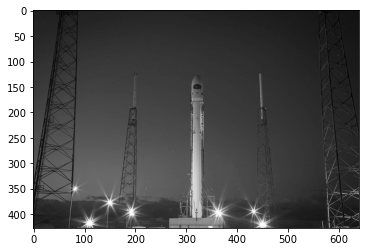

(427, 640)


In [79]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
import skimage.io as io
import time
import scipy

# get image
image = data.rocket()
print(image.shape)

# rgb -> gray and plot image
coffee = rgb2gray(image)
original_image = coffee
plt.imshow(coffee, cmap='gray')
plt.show()
print(coffee.shape)

In [80]:
def padding(image):
    """
    Функция паддит (дополняет) исходное изображение нулями по краям
    Args:
      image - исходное изображение (дву- трехмерная матрица)
    Returned:
      padded_image - новая матрица, исходное изображение дополненное нулями по краям
    """
    return np.pad(image, pad_width=1, mode='constant', constant_values=0)

In [81]:
def convolve(image, kernel):
    """
    Функция двумерной свертки
    Args:
      image - изображение (дву- трехмерная матрица)
      kernel - ядро свертки
    Returned:
      convolved_image - новая матрица, результат свертки
    """
    n1, n2 = image.shape
    convolved_image = np.zeros((n1 - 2, n2 - 2))
    for i in range(n1-2):
        for j in range(n2-2):
            convolved_image[i,j] += abs(sum(sum(image[i:i+3,j:j+3]*kernel)))
    return convolved_image

In [82]:
def grad_sum(image):
    """
    Функция построения матрицы сумм по алгоритму пути наименьшего сопротивления
    Args:
      image - изображение (дву- трехмерная матрица)
    Returned:
      sum_array - новая матрица с суммами
    """
    n1, n2 = image.shape
    sum_array = np.zeros((n1, n2))
    sum_array[n1-1,:] += image[n1-1,:]
    for i in range(1, n1):
        for j in range(n2):
            if j == 0:
                sum_array[n1-1-i,j] = image[n1-i,j] + min(sum_array[n1-i,j], sum_array[n1-i,j+1])
            elif j == n2-1:
                sum_array[n1-1-i,j] = image[n1-i,j] + min(sum_array[n1-i,j-1], sum_array[n1-i,j])
            else:
                sum_array[n1-1-i,j] = image[n1-i,j] + min(sum_array[n1-i,j-1], sum_array[n1-i,j], sum_array[n1-i,j+1])
    return sum_array

In [83]:
def delete(image, sum_array):
    """
    Функция удаления маловажных пикселей (с наименьшей суммой)
    Args:
      image - исходное изображение (дву- трехмерная матрица)
      sum_array - матрица сумм
    Returned:
      new_image - новая изображение с удаленными пикселями
    """
    n = sum_array.shape[0]
    n1 = sum_array.shape[1]
    sum_array1 = np.zeros(n)
    sum_array1[0] = np.argmin(sum_array[0,:])
    for i in range(1, n):
        if sum_array1[i-1] == 0:
            m = min(sum_array[i,int(sum_array1[i-1])], sum_array[i,int(sum_array1[i-1]+1)])
            if sum_array[i,int(sum_array1[i-1])] == m:
                sum_array1[i] = sum_array1[i-1]
                continue
            else:
                sum_array1[i] = sum_array1[i-1]+1
        elif sum_array1[i-1] == n1-1:
            m = min(sum_array[i,int(sum_array1[i-1]-1)], sum_array[i,int(sum_array1[i-1])])
            if sum_array[i,int(sum_array1[i-1])] == m:
                sum_array1[i] = sum_array1[i-1]
                continue
            else:
                sum_array1[i] = sum_array1[i-1]-1
        else:
            m = min(sum_array[i,int(sum_array1[i-1]-1)], sum_array[i,int(sum_array1[i-1])], sum_array[i,int(sum_array1[i-1]+1)])
            if sum_array[i,int(sum_array1[i-1])] == m:
                sum_array1[i] = sum_array1[i-1]
                continue
            elif sum_array[i,int(sum_array1[i-1]-1)] == m:
                sum_array1[i] = sum_array1[i-1]-1
                continue
            else:
                sum_array1[i] = sum_array1[i-1]+1
    n1, n2 = image.shape
    n2 -= 1
    new_image = np.zeros((n1, n2))
    for i in range(n1):
        y = image[i,:]
        new_image[i,:] = np.append(y[:int(sum_array1[i])],y[int(sum_array1[i]+1):])
    return new_image

In [84]:
# Ядро для свертки, для выделения границ объектов
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

На сколько пикселей уменьшить изображение?
300
398.6744067668915 sec
Удалено 300 пикселей
Новый размер картинки: (427, 340)


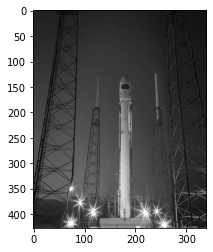

Оригинал: (427, 640)


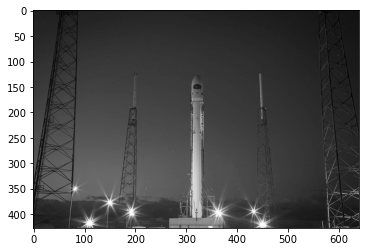

In [85]:
print('На сколько пикселей уменьшить изображение?')
n = int(input())
t = time.time()
for i in range(n):
    padded_image = padding(coffee)
    convolved_image = convolve(padded_image, edge_detection_kernel)
    sum_array = grad_sum(convolved_image)
    coffee = delete(coffee, sum_array)
t = time.time()-t
print(f'{t} sec')
print(f'Удалено {n} пикселей\nНовый размер картинки: {np.shape(coffee)}')
plt.imshow(coffee, cmap='gray')
plt.show()
print(f'Оригинал: {np.shape(original_image)}')
plt.imshow(original_image, cmap='gray')
plt.show()